In [1]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.optimizers import Adadelta
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.layers import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from IPython.display import clear_output

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
files = !cd Datasets/20_genomes_species_splitted/50_splitted && ls *.csv
files = list(map(lambda x: 'Datasets/20_genomes_species_splitted/50_splitted/'+x.split(' ')[-1],files))

In [3]:
d = pd.concat([pd.read_csv(f, index_col=0, header=0) for f in files],ignore_index=True)

In [4]:
names, occ = np.unique(d['class'].values, return_counts=True)

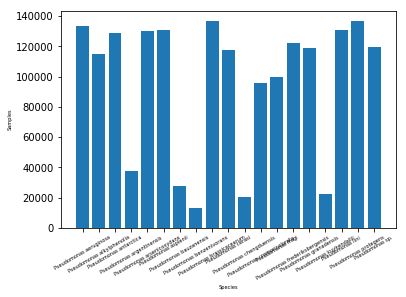

In [5]:
index = np.arange(len(names))
plt.bar(index, occ)
plt.xlabel('Species', fontsize=5)
plt.ylabel('Samples', fontsize=5)
plt.xticks(index,names, fontsize=5, rotation=30)
plt.savefig('dist19.png')
plt.show()

In [6]:
data = d[['class','seq']]

In [7]:
data.sample(10)

,class,seq
635191,Pseudomonas asplenii,ATCGCGCCCTTGGCGCGTACGCCGAGGCGGCCCTTGAAGTAGTCCC...
244197,Pseudomonas alkylphenolia,CCCGGTGGACGCCAAGGACCTGGCCACGCGCAAGCGGGTTGGCTTC...
1169029,Pseudomonas fragi,CAGCAGATGCGTGGGCAGGTTGATAGACACCGGAATGTCCCAGCCC...
1122975,Pseudomonas fragi,GGCTGAGTCAAAGCTCCCAAGGGTTGAGCACAGGAGCGCCGCTAAA...
157801,Pseudomonas alkylphenolia,TGATGCCCGGCACGCCCGACCCGTTGCAGGAAGGCGGCGATGGAGC...
1130481,Pseudomonas fragi,ATAACGGATGCTGCCTTGGGTCTGCACGTCTTTGCCCGGCAGCAGG...
1184779,Pseudomonas fragi,GGTCATTGGCGTACTGAGGACTGTGGGAGCGGGCTTGCTCGCGATT...
988574,Pseudomonas chengduensis,TTGCCCTGCTGCATCAGTTGCAGCAGCCGCTGGATCAGCGCTTCGT...
974175,Pseudomonas chengduensis,GACCAACAGTGCCGGAGAACAGCGGGGTACGTCCGGAGAACAGCAG...
1004579,Pseudomonas cremoricolorata,AGGTGCTGGGCAATCTGTCGCTGCTGGATGCACCGCAAAAGCGCAG...


In [8]:
current_size = data[data['class']=='Pseudomonas benzenivorans'].shape[0]
print(current_size)

13459


In [9]:
training_data_pos = data[data['class']=='Pseudomonas benzenivorans'].sample(int(current_size*0.8)) #80%

In [10]:
(data[data['class']!='Pseudomonas benzenivorans'].shape[0]-int(current_size*0.8)*18)/18 

90587.55555555556

In [11]:
if (data[data['class']!='Pseudomonas benzenivorans'].shape[0]-int(current_size*0.8)*18)/18 >= 0:
    training_data_neg = data[data['class']!='Pseudomonas benzenivorans'].sample(int(current_size*0.8)*18)
else:
    training_data_neg = data[data['class']!='Pseudomonas benzenivorans'].sample(int((data.shape[0]-current_size)*0.8))

In [12]:
data_neg = data.ix[data.index.symmetric_difference(data[data['class']=='Pseudomonas benzenivorans'].index)]
data_neg = data_neg.ix[data_neg.index.symmetric_difference(training_data_neg.index)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [13]:
test_data_neg = pd.DataFrame([],columns=['class','seq'])
names_no = names.tolist()
names_no.remove('Pseudomonas benzenivorans')
for name in names_no:    
    print(name)
    if data_neg[data_neg['class']==name].shape[0] > current_size*0.2:
        test_data_neg = pd.concat([test_data_neg,data_neg[data_neg['class']==name].sample(int(current_size*0.2))])
    else:
        test_data_neg = pd.concat([test_data_neg,data_neg[data_neg['class']==name]])   

Pseudomonas aeruginosa
Pseudomonas alkylphenolia
Pseudomonas antarctica
Pseudomonas argentinensis
Pseudomonas arsenicoxydans
Pseudomonas asplenii
Pseudomonas bauzanensis
Pseudomonas brassicacearum
Pseudomonas cerasi
Pseudomonas chengduensis
Pseudomonas cremoricolorata
Pseudomonas fragi
Pseudomonas frederiksbergensis
Pseudomonas granadensis
Pseudomonas kuykendallii
Pseudomonas lini
Pseudomonas protegens
Pseudomonas sp.


In [14]:
test_data_pos = data[data['class']=='Pseudomonas benzenivorans'].ix[training_data_pos.index.symmetric_difference(data[data['class']=='Pseudomonas benzenivorans'].index)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [15]:
training_data = pd.concat([training_data_neg,training_data_pos]).sample(frac=1)
test_data = pd.concat([test_data_neg,test_data_pos]).sample(frac=1)

In [16]:
_, trainocc = np.unique(training_data['class'], return_counts=True)

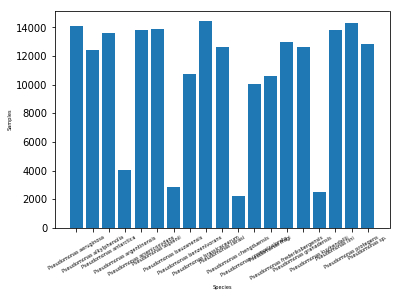

In [17]:
index = np.arange(len(names))
plt.bar(index, trainocc)
plt.xlabel('Species', fontsize=5)
plt.ylabel('Samples', fontsize=5)
plt.xticks(index,names, fontsize=5, rotation=30)
plt.show()

In [18]:
_, testocc = np.unique(test_data['class'], return_counts=True)

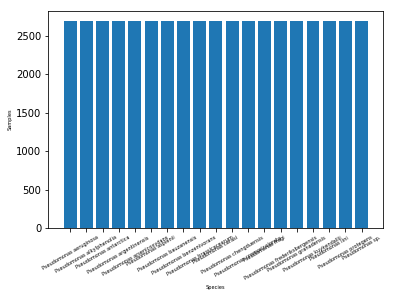

In [19]:
index = np.arange(len(names))
plt.bar(index, testocc)
plt.xlabel('Species', fontsize=5)
plt.ylabel('Samples', fontsize=5)
plt.xticks(index,names, fontsize=5, rotation=30)
plt.show()

In [20]:
seq = []
lun = 0
for i in range(training_data.shape[0]):
    if i % 1000 == 0:
        sys.stdout.write('Preproc progress: %f \r' % (i*100/training_data.shape[0]))
        sys.stdout.flush()
        clear_output(wait=True)
    if training_data.iloc[i,0].strip() == 'Pseudomonas benzenivorans':
        s = list(map(lambda x: int(ord(x)-65), list(training_data.iloc[i,1].strip()))) + [training_data.iloc[i,0].strip()]
    else:
        s = list(map(lambda x: int(ord(x)-65), list(training_data.iloc[i,1].strip()))) + ['other']
    seq.append(s)
seq = np.asarray(seq)

In [21]:
seq

array([['6', '6', '6', ..., '2', '19', 'Pseudomonas benzenivorans'],
       ['6', '19', '2', ..., '19', '6', 'other'],
       ['0', '19', '19', ..., '2', '6', 'other'],
       ...,
       ['2', '2', '19', ..., '19', '2', 'other'],
       ['0', '19', '2', ..., '2', '2', 'other'],
       ['19', '19', '2', ..., '0', '19', 'other']], dtype='<U25')

In [22]:
test_seq = []
lun = 0
for i in range(test_data.shape[0]):
    if i % 1000 == 0:
        sys.stdout.write('Preproc progress: %f \r' % (i*100/test_data.shape[0]))
        sys.stdout.flush()
        clear_output(wait=True)
    if test_data.iloc[i,0].strip() == 'Pseudomonas benzenivorans':
        s = list(map(lambda x: int(ord(x)-65), list(test_data.iloc[i,1].strip()))) + [test_data.iloc[i,0].strip()]
    else:
        s = list(map(lambda x: int(ord(x)-65), list(test_data.iloc[i,1].strip()))) + ['other']
    test_seq.append(s)
test_seq = np.asarray(test_seq)

In [23]:
test_seq

array([['6', '0', '19', ..., '6', '2', 'other'],
       ['6', '0', '6', ..., '6', '2', 'other'],
       ['19', '6', '0', ..., '19', '6', 'other'],
       ...,
       ['19', '2', '6', ..., '6', '0', 'other'],
       ['2', '19', '2', ..., '19', '2', 'other'],
       ['2', '6', '2', ..., '0', '0', 'other']], dtype='<U25')

In [24]:
X_train = seq[:,:-1]
X_test = test_seq[:,:-1]
y_train = seq[:,-1]
y_test = test_seq[:,-1]

X_train = X_train.astype('int')
X_test = X_test.astype('int')

In [25]:
X_train[0]

array([ 6,  6,  6,  2,  0,  2, 19,  6,  6,  2, 19,  6, 19, 19,  2,  6,  2,
        0,  2, 19,  6, 19, 19, 19,  6,  2,  6,  2,  0,  0,  2,  0,  0,  2,
        0,  6,  2,  6,  6,  2,  0,  2, 19, 19,  2,  2, 19,  6,  0, 19,  6,
        2,  6,  2,  2, 19,  6,  2,  2,  6, 19,  6, 19,  6,  6,  2, 19,  0,
        2,  0,  0,  2,  6,  2,  6,  2,  0,  6,  6, 19, 19,  0,  0,  0,  2,
        0,  0, 19, 19, 19,  2, 19,  2,  2,  6, 19, 19,  2,  6,  6,  6,  0,
        2,  0,  6,  6,  2,  2,  6,  0,  6,  6,  0,  2,  0,  2,  6,  2, 19,
        6,  2,  2,  2, 19, 19,  2,  6,  2,  6,  6,  2,  2,  0,  6, 19,  2,
        0,  2,  6,  2,  2,  6,  0,  6,  6,  2,  6,  2,  6,  2,  2, 19,  6,
       19, 19,  2, 19,  6,  2,  0,  2,  2,  6,  0,  6,  6,  2,  2,  6,  6,
       19,  6, 19, 19,  6,  0, 19,  2,  2,  2,  6,  2,  6,  6,  2,  2,  2,
        0,  6,  0, 19,  2,  0,  0,  0,  2, 19,  6,  2,  6,  6,  2, 19,  0,
        0, 19,  2,  2,  6,  6,  0, 19,  2,  6,  0,  6, 19, 19,  6,  6,  2,
        2,  6,  6,  2,  6

In [26]:
import gc
del data_neg
del training_data_neg
del training_data_pos
del test_data_neg
del test_data_pos
gc.collect()

14

In [27]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
enc.fit(X_train.flatten().astype('str'))
X_train = np.asarray(list(map(lambda x: enc.transform(x.astype('str')),X_train)))
X_test = np.asarray(list(map(lambda x: enc.transform(x.astype('str')),X_test)))

In [28]:
encoder = LabelEncoder()
encoder.fit(y_test)
y_train = encoder.transform(y_train)
y_train = np_utils.to_categorical(y_train)
y_test = encoder.transform(y_test)
y_test = np_utils.to_categorical(y_test)

In [29]:
print(X_train.shape)
print(X_test.shape)

(204573, 250, 5)
(51130, 250, 5)


In [37]:
model = Sequential()
model.add(layers.Conv1D(filters=128,kernel_size=28, strides=1, activation='relu', input_shape=(250, 5)))
#model.add(layers.MaxPooling1D(2))
model.add(BatchNormalization())
model.add(layers.Conv1D(filters=128,kernel_size=5, strides=1, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(filters=128,kernel_size=3, strides=1, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(2, activation='softmax'))

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 223, 128)          18048     
_________________________________________________________________
batch_normalization_1 (Batch (None, 223, 128)          512       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 219, 128)          82048     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 109, 128)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 107, 128)          49280     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total para

In [146]:
opt = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, decay=0.0)
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [147]:
history = model.fit(X_train, y_train, epochs=21, batch_size=250, verbose=1, validation_data=(X_test,y_test))

Train on 204573 samples, validate on 51130 samples
Epoch 1/21
204573/204573 [==============================] - 27s - loss: 0.2080 - acc: 0.9461 - val_loss: 0.2000 - val_acc: 0.9473
Epoch 2/21
204573/204573 [==============================] - 27s - loss: 0.1956 - acc: 0.9474 - val_loss: 0.1984 - val_acc: 0.9473
Epoch 3/21
204573/204573 [==============================] - 27s - loss: 0.1898 - acc: 0.9474 - val_loss: 0.1905 - val_acc: 0.9473
Epoch 4/21
204573/204573 [==============================] - 27s - loss: 0.1838 - acc: 0.9474 - val_loss: 0.1860 - val_acc: 0.9473
Epoch 5/21
204573/204573 [==============================] - 27s - loss: 0.1778 - acc: 0.9473 - val_loss: 0.1834 - val_acc: 0.9473
Epoch 6/21
204573/204573 [==============================] - 27s - loss: 0.1708 - acc: 0.9474 - val_loss: 0.1831 - val_acc: 0.9465
Epoch 7/21
204573/204573 [==============================] - 27s - loss: 0.1635 - acc: 0.9476 - val_loss: 0.1728 - val_acc: 0.9474
Epoch 8/21
204573/204573 [=============

KeyboardInterrupt: 

In [ ]:
get_ipython().magic(u'matplotlib inline')
plt.plot(range(1,22), history.history['loss'])
plt.plot(range(1,22), history.history['val_loss'])

In [39]:
model.save('TT_50_1AA.h5')
model.save_weights('TT_50_1AA_w.h5')

In [30]:
from keras.models import load_model
model = load_model('TT_50_1AA.h5')

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [31]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
pred = model.predict(X_test, batch_size=1, verbose=0)

In [32]:
confusion_matrix(encoder.inverse_transform(np.argmax(y_test, axis=1)),encoder.inverse_transform(np.argmax(pred, axis=1)))

/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([[ 2655,    37],
       [   76, 48362]])

In [33]:
precision_score(encoder.inverse_transform(np.argmax(y_test, axis=1)),encoder.inverse_transform(np.argmax(pred, axis=1)), pos_label='Pseudomonas benzenivorans')

/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9721713658000732

In [34]:
recall_score(encoder.inverse_transform(np.argmax(y_test, axis=1)),encoder.inverse_transform(np.argmax(pred, axis=1)), pos_label='Pseudomonas benzenivorans')

/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.986255572065379

In [35]:
f1_score(encoder.inverse_transform(np.argmax(y_test, axis=1)),encoder.inverse_transform(np.argmax(pred, axis=1)), pos_label='Pseudomonas benzenivorans')

/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.97916282500461

In [36]:
f1_score(encoder.inverse_transform(np.argmax(y_test, axis=1)),encoder.inverse_transform(np.argmax(pred, axis=1)), pos_label='other')

/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9988330906574967

5
[0.09863809 0.90136194]
(1, 250, 5)
(219, 128)


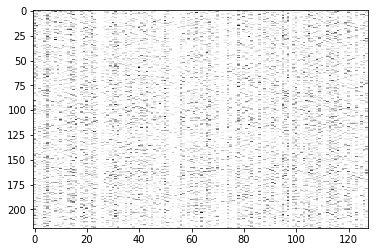

In [88]:
count = 0
while (y_test[count] == [1,0]).sum() != 2 :
    count+=1
print(count)
print(pred[count])

model2 = Sequential()
model2.add(model.layers[0])

dna_batch = np.expand_dims(X_test[count],axis=0)
print(dna_batch.shape)
conv_dna = model2.predict(dna_batch)
dna = np.squeeze(conv_dna,axis=0)
print(dna.shape)
plt.imshow(dna,cmap='Greys',interpolation='nearest',aspect='auto')
plt.show()

In [45]:
model2 = Sequential()
model2.add(model.layers[1])

In [89]:
count = 0
pos_ex = []
kernel_act = np.zeros((1,128))
kernel_act2 = np.zeros((1,128))
for p,t in zip(pred,y_test):
    if t[0] > t[1] and p[0] > p[1] and p[0] > 0.999:
        pos_ex.append(enc.inverse_transform(X_test[count,:]))
        dna_batch = np.expand_dims(X_test[count],axis=0)
        conv_dna = model2.predict(dna_batch)
        feature_map = np.squeeze(conv_dna,axis=0)
        kernel_act = np.vstack([kernel_act,feature_map.argmax(axis=0)])
        kernel_act2 = np.vstack([kernel_act2,feature_map.max(axis=0)])
    count += 1
pos_ex = np.asarray(pos_ex)
kernel_act = kernel_act[1:,:].astype(int)
kernel_act2 = kernel_act2[1:,:]
print(count)


51130


In [92]:
kernel_act2.mean(axis=0).argmax()

95

In [91]:
seq_inv = []
lun = 0
for i in range(pos_ex.shape[0]):
    s = list(map(lambda x: chr(int(x)+65),pos_ex[i,:]))
    seq_inv.append(''.join(s))
seq_inv = np.asarray(seq_inv)

In [93]:
seeds = []
count = 0
k = 95
for i in kernel_act[:,k]:
    if kernel_act2[i,k] > np.percentile(kernel_act2[:,k],97):
        string = seq_inv[count]
        seeds.append(string[i:i+28])
#seeds = np.asarray(seeds)

In [94]:
len(seeds)

6

In [95]:
import os
from io import StringIO
import weblogolib as w

class RefSeqColor(w.ColorRule):
    """
    Color the given reference sequence in its own color, so you can easily see 
    which positions match that sequence and which don't.
    """

    def __init__(self, ref_seq, color, description=None):
        self.ref_seq = ref_seq
        self.color = w.Color.from_string(color)
        self.description = description

    def symbol_color(self, seq_index, symbol, rank):
        if symbol == self.ref_seq[seq_index]:
            return self.color

baserules = [
            w.SymbolColor("G", "green", "polar"),
            w.SymbolColor("C", "orange", "neutral"),
            w.SymbolColor("T", "blue", "basic"),
            w.SymbolColor("A", "red", "acidic"),
        ]

protein_alphabet = w.Alphabet('ACDEFGHIKLMNOPQRSTUVWYBJZX*-adefghiklmnopqrstuvwybjzx', [])

def plotseqlogo(refseq, mseqs, name):
    fasta = "> \n" + "\n> \n".join(mseqs)
    seqs = w.read_seq_data(StringIO(fasta), alphabet=protein_alphabet)

    colorscheme = w.ColorScheme(baserules,
                                alphabet = protein_alphabet)

    data = w.LogoData.from_seqs(seqs)
    options = w.LogoOptions()
    # options.logo_title = name
    options.show_fineprint = False
    options.yaxis_label = ""
    options.color_scheme = colorscheme
    mformat = w.LogoFormat(data, options)

    fname = "%s.pdf" % name
    with open(fname, "wb") as f:
        f.write(w.pdf_formatter(data, mformat))

if __name__ == "__main__":
    testdata = seeds
    plotseqlogo(seeds[0], testdata, 'testdata')

In [ ]:
[RefSeqColor(refseq, "orange", "refseq")] + 

In [125]:
np.percentile(np.asarray([0,1,2,3,4,5,6,7,8,9,10]),33)

3.3000000000000003

In [13]:
w = w.tomutable()

50